# Assessed Lab 2 (CITS5508 Machine Learning)

# Name: Raj Joshi

# Student ID: 22627911

## 1. Introduction

   <br>
   
   A Computer Vision system was developed to distinguish different types of beans based on their shape,type and structure. We will perform a similar operation on the same beans dataset to classify the type of beans based on these features. Since the unit is about Machine Learning, we will achieve this task by Classification Algorithm and provide detailed summary of our observations.
   
   In this lab we will focus on feature scaling and fitting, predicting ML algorithms on the dataset and evaluate the model based on the confusion matrix. This ipynb file focuses on fitting ML algorithm and fine tuning the parameters for better results. We will also get a brief idea the different scaling functions,parameters and how it affects the model building.



>### 1.1 Importing necessary functions and libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,precision_score,accuracy_score
from sklearn.linear_model import SGDClassifier
import os

> ### 1.2 Getting the path and saving the dataset in a pandas dataframe

<br>
   First level analysis will be based on the structure of the data and types of data available in the dataset. Here, we are mostly dealing with numeric data and just one column with the <strong>categorical</strong> datatype. Categorical variable <font color='red'>'Class'</font> is also the classifying output for the beans based on the structure and features of the beans. This gives us a rough idea, that it is indeed a target variable for our Classification Algorithm.

   Load up the dataset using the <code>pd.read_excel()</code> function of the pandas library.Just to get an overview of how the data looks like, we will use the **'head()'**. The data describes the shape and sizes of a bean and how does it classify into different types of bean. Here we can see that there are 16 numeric variables and 1 categorical variable('Class'). 
   
   All the columns of the dataset is numeric apart from the class, hence it won't be much difficult to transform and scale the data. The <code>describe()</code> function shows some basic statistical data about the dataset. The dataset has columns with wide range of data 'Area' being in thousands to 'Eccentricity' being in values less than 1.

In [2]:
path = os.path.join('DryBeanDataset', 'Dry_Bean_Dataset.xlsx')
df = pd.read_excel(path)

df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.shape

(13611, 17)

In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


> ### 1.3 Selecting the top 6 features for Scatter_matrix


The Scatter matrix is used to depict the relationship or the equation between two columns. Heatmaps are used to show the correlation between columns, in a graphical way. The columns that show high correlation have denser colors and columns with more shade of white shows negative correlation. A brief insight on the correlation of columns is presented below.

<br>
<br>

 - Area is influenced by the Perimeter and dimesnsions of the bean, hence it would show a good amount of correlation between *Area,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,Diameter*.
 <br>
 <br>
 - The other strong correlation is between Extent, Solidity,Roundness,Compactness and ShapeFactor variables.
 <br>
 <br>

***Note:*** A heatmap is plotted below to show the correlation between the features. The correlation ranges from +1 to -1, with -1  showing no correlation at all.

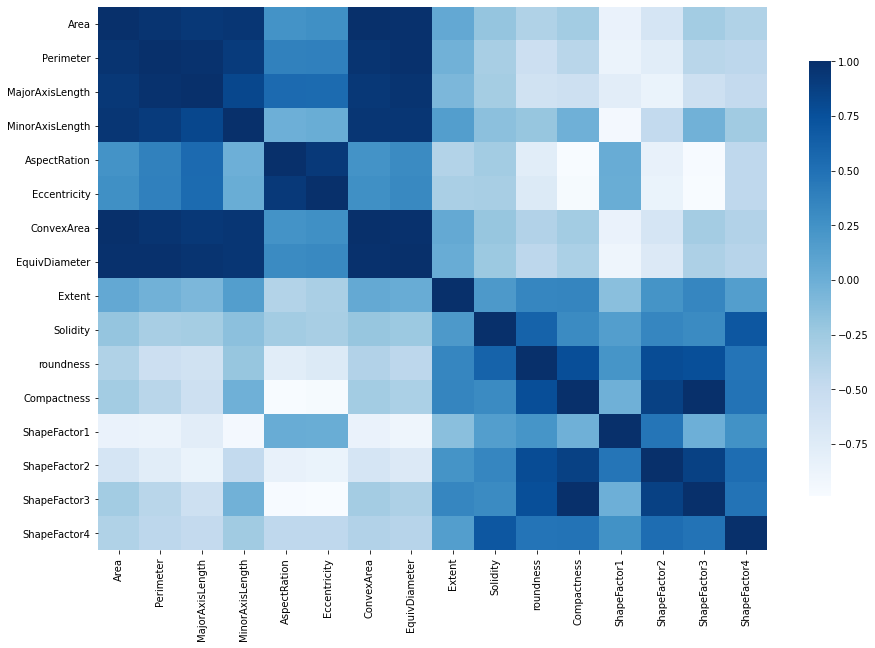

In [5]:
correlation = df.corr()
plt.figure(figsize=(15,10))
plot1 = sns.heatmap(correlation,cmap="Blues",cbar_kws={"shrink": .8},fmt='2.f')


>### 1.4 Scatter_matrix Description 


The Scatter Matrix is used to define the relationship between two columns. The relationship can be linear, polynomial, exponential. A straight line from the origin determines highly correlated data. A negative slope determines the columns are not correlated at all or the correlation is -1.A straight line from the origin depicts gradual and equal increase in Column X and Y. Useful information on how the data behaves is conveyed by the scatter matrix. An example of the scatter matrix with respect to the beans dataset is explained below.

For the Scatter_matrix, here we have used the 6 features which are not highly correlated in any manner. The main motive behind choosing uncorrelated data is to understand how the scatter matrix works.

From the below scatter matrix we can clearly see two distinct data clusters as we have selected columns with less correlation. However, we can clearly see a negative correlation between **Area** and **ShapeFactor1**, as they have correlation of **-0.86** as per correlation matrix. The diagonal histograms are result of the correlation of itself and plots the datapoints respectively.

A scatter matrix of all 16 columns would make the graph messy and unreadable. Hence a short, readable scatter matrix is plotted below.

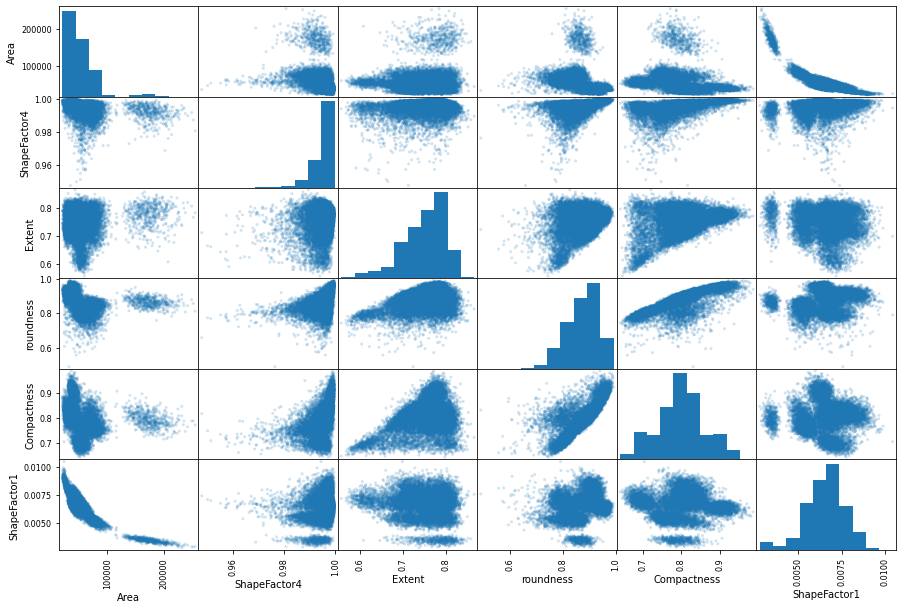

In [6]:
data = df[['Area','ShapeFactor4','Extent','roundness','Compactness','ShapeFactor1','Class']]

scatter_matrix = pd.plotting.scatter_matrix(data, alpha=0.2,figsize=(15,10))

## 2. Instances of class


By looking at the data we can derive that the 'Class' of the bean is determined by the features such as Area, Extent, Solidity, Roundness,ShapeFactors, etc. Hence, we can say that 'Class' is a dependent variable and rest 16 as indepent variable. The determination of each class has to be trained by a model, that could help us predict better for the testing dataset. The Classification model is computed by the features we pass in the training and test set. Since all the data is numeric, there is no need for any type of encoding or converting the datatypes.



The data shows that there is not even distribution of values in each 'Class'. The beans of <font color='red'>'DERMASON'</font> is far more than the rest and beans of <font color='red'>'BOMBAY'</font> class is far less. We can say that,

<br>
<br>
1. DERMASON,SIRA are a common bean to be found in the given region.
<br>
<br>
2. BOMBAY beans are rare to find.
<br>
<br>
3. Dataset is too small to make any concrete decision.

In [7]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

## 3. Train Test Split


<BR>
    The classification model is computed using train and test dataset. The main idea behind splitting the data is to check how a model performs on a new dataset with same columns and structure. If the model performs poorly then, there is a dire need of finetuning parameters or use all together different ML algorithm. Hence, we split the data and train the model on the training dataset and evaluate the model using test dataset.
    
    Splitting of the data can be done in any ratio, however it is a good practice to keep the test dataset slightly lower than the train dataset, so our model can perform better. Usually the split is 80/20 and some cases 75/25, we will be using the 80/20 split for training our model. The train/test split and the number of rows in each split is mentioned below.

In [8]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

print('Train Set Size and Columns: ',train_set.shape)
print('Test Set Size and Columns: ',test_set.shape)

Train Set Size and Columns:  (10888, 17)
Test Set Size and Columns:  (2723, 17)


In [9]:
## Splitting into X_train,X_test, Y_train, Y_test


x_train = train_set.iloc[:,:-1]
x_test = test_set.iloc[:,:-1]


y_train = train_set.iloc[:,-1]
y_test = test_set.iloc[:,-1]



## 4. Standard Scaler on train test data


As per the analysis of data, 'Area', 'Perimeter' are two of the few columns that are in thousands, one reason of such a high value of these columns could be unit of scale on these columns. Absence of units scale can make one merely assume it to be milimeter or less. Model cannot be trained on such high values as it could lead to errorneous outputs in the classification.

<br>

Scaling is basically used to downscale numeric values so that it could be fed to the model. Having Area is thousands while the ShapeFactors being a fractional unit, won't lead to a good model prediction. Hence, we are using scaling technique which suites best for our model prediction. The two main types of scaling are <strong>Standard Scaling</strong> and <strong>MinMax Scaling</strong>. The use of the scaling technique simply depends on the dataset and ML output in the first trial.

 - **Standard Scaler** imputes value closer to the unit variance, so the outliers might be heavily punished by it.StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers. But it reflects the inliers with proper representation.
<br>
<br>
 - **MinMax Scaler** scales the features in [0,1] or a specified range, hence all the data is squeezed in the range of 0 and 1 in default scenario. It is possible that the inliers closer to 0 would be scaled to 0.00005%. Thereby, concentrating the data closer to zero.

After implying both the scaling techniques we came to a conclusion that StandarScaler() works best for our dataset. The MinmaxScaler() works best on the SVM classifier but fails miserably on the SGD Classifier.The code below depicts the use of Standard Scaler and SGDClassifier on training and test dataset. We can see how miserably it fails against the test data




<br>
<br>
<code>accuracy_sgd =accuracy_score(y_test, sgd_pred_test)
print('Accuracy Score (Test data): ',accuracy_sgd)
</code>


**Output**

***
Accuracy Score (Training Dataset):  0.8973181484202792 <br>
Accuracy Score (Test data):  0.712082262210797
***

Functionality of the functions of Scaling techniques.


   - .fit() applies to population mean and standard deviation of the columns. Meaning all the numeric values will be scaled down and then compute the values using the mean and standard deviation. 
   <br>
   <br>

   - .transform() applies to particular set of examples that are to be scaled of a column. Meaning working on random sampled data. This works with specific data or with trial cases.
<br>
<br>
   - .fit_transform() combines the above two methods.
<br>
<br>
<strong>Note: </strong>We tried fitting the model using **.fit()** and **.transform()** and the accuracy scores on test dataset were **0.26** and **0.46** respectively.

The output with **.fit_tranform()** gave a good accuracy score of **0.91** on test dataset

> ### 4.1 Illustration of the scaling output
<br>
<br>

  The performance of both the models is much better using the standard scaler. The main reason behind it is MinMaxScaler imputes the value between 0 and 1 or between a specified range(-1,1). So there might be a possibility that the inliers or the minimum value would be closer to 0 with respect to scaling. 
  
  
  In the histogram output given below shows the spread of values in each feature after applying the StanardScaler(). The scaling functions must be applied to both training and test dataset, but should not be applied to feature variable in this case. We would have to encode the feature variable or typecast the feature variable to numeric values and then perform scaling.

<ipython-input-10-717d9d5ae986>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  training_scaled.hist(ax=ax)


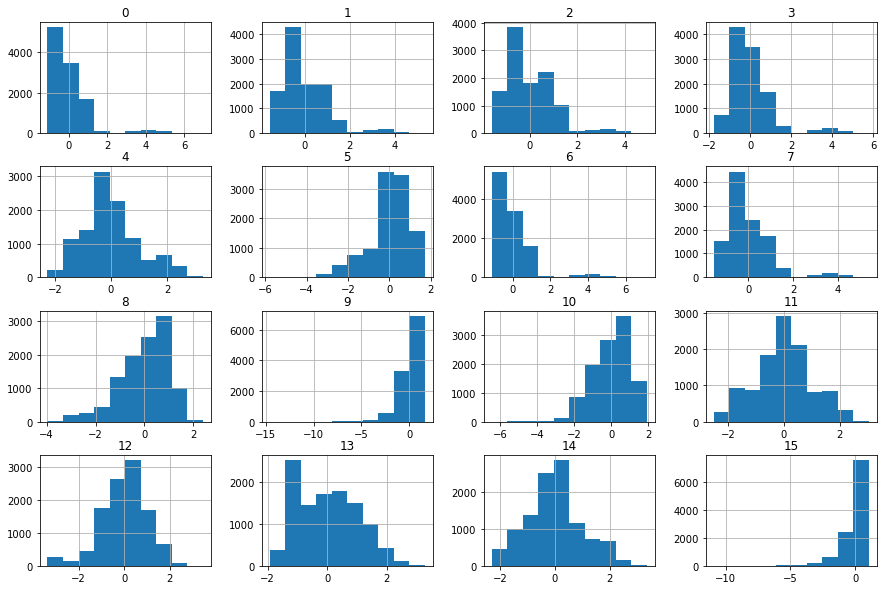

In [10]:
Scaler = preprocessing.StandardScaler()
training_scaled = Scaler.fit_transform(x_train)
training_scaled = pd.DataFrame(training_scaled)

fig,ax=plt.subplots(figsize=(15,10))
training_scaled.hist(ax=ax)
plt.show()

<ipython-input-11-28504a74464e>:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  test_scaled.hist(ax=ax)


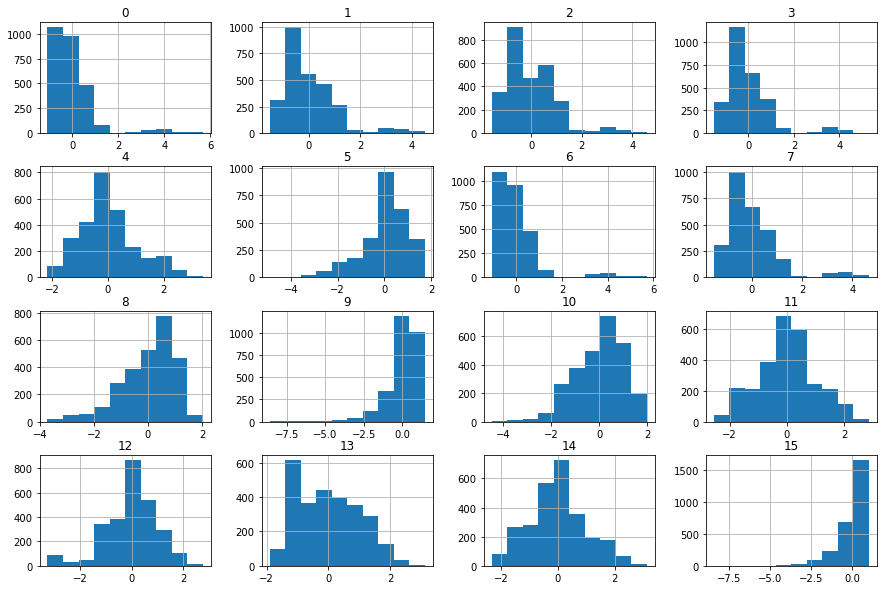

In [11]:
Scaler = preprocessing.StandardScaler()
test_scaled = Scaler.fit_transform(x_test)
test_scaled = pd.DataFrame(test_scaled)


#print(test_scaled.describe())
fig,ax=plt.subplots(figsize=(15,10))
test_scaled.hist(ax=ax)
plt.show()

## 5. Performing SVM Classifier on data

<br>
Support Vector Machine is a powerful library that has ample of functionalities to help fit,predict and evaluate complex machine learning problems. We will be using the SVMClassifier to classify our beans. The SVMClassifier provides wide variety of facilities such as: 
<br>
<ul>
 <li>selection of kernel</li>
 <li>selecting the regularisation parameter</li>
 <li>selection of heuristic function</li>
 <li>set class weights for imbalanced dataset</li>
 <li>selection of classifier type(one-versus-one or one-versus-rest)</li>
    </ul>
<br>
<br>
We have fitted the model on using all kernels to compare and determine the best model for our dataset with good accuracy scores and confusion matrix. Assigning the default parameters to the <mark><strong>Radial Basis (RBF)</strong></mark> kernel and <code>decision_function_shape = 'ovo'</code> which specifies the one-vs-one binary classifier works best for us. 
<br>
<br>
If we compare different models after fine-tuning some parameters we would find some suprising results on the model. All the additional scores and finetuning parameters are mentioned in the end and the best performing parameters are explained and performed below.
<br>
<br>

**Parameter tuning**

 - **Gamma** - The influence of a single training sample. The low the gamma the low influence.
 <br>

 - **C** - Is the regularization parameter for the kernel. The penalty is usually *squared l2*. The higher the C results in better training accuracy as we closely plot the curve or line based on the points. Higher 'C' value does not always gaurantee a better result on test dataset, as the model might perform well in training dataset but failing miserably on the test dataset.
<br>
 - **Decision_function_** - The classifier attribute which determines 'one-vs-one' classifier or 'one-vs-rest' classifier. We have used one-vs-one classifier.

In [12]:
rbf = svm.SVC(kernel='rbf', gamma='scale', C=1, decision_function_shape='ovo').fit(training_scaled, y_train)

linear = svm.SVC(kernel='linear', C=20, decision_function_shape='ovo').fit(training_scaled, y_train)

poly = svm.SVC(kernel='poly', degree=2, C=20, decision_function_shape='ovo').fit(training_scaled, y_train)

sig = svm.SVC(kernel='sigmoid', C=20, decision_function_shape='ovo').fit(training_scaled, y_train)

>## 5.1 Applying model on test dataset

In [13]:
linear_ypred = linear.predict(test_scaled)
poly_ypred = poly.predict(test_scaled)
rbf_ypred = rbf.predict(test_scaled)
sig_ypred = sig.predict(test_scaled)

>## 5.2 Calculating scores on SVM Standard scaler with High C value and Kernel = 'rbf'

<br>
<strong> C </strong> is the regularisation parameter constant
Example of high C value resulting in poor test scores

<code>rbf_std = svm.SVC(kernel='rbf', gamma=2, C=20, decision_function_shape='ovo').fit(std_df_train, y_train)    
</code>


<br>

***
**Output**

<br>
Accuracy Score (Training Dataset):  0.9894379132990448
<br>
Accuracy Score (Test Dataset):  0.8927653323540213

***

> ## 5.3 Plotting confusion matrix

<br>
<br>

The confusion matrix for the rbf kernel of SVM performs good on the testing dataset. It classifies almost all beans perfectly. The confusion matrix is used to derive the True positive and False positive rate, which in turn is used for calculating the accuracy and precision scores for the model.
<br> 
<br>
Yaxis : Yactual data
<br>
<br>
Xaxis : YPredicted data
<br>
<br>
Dark shade represents higher concentration of data.

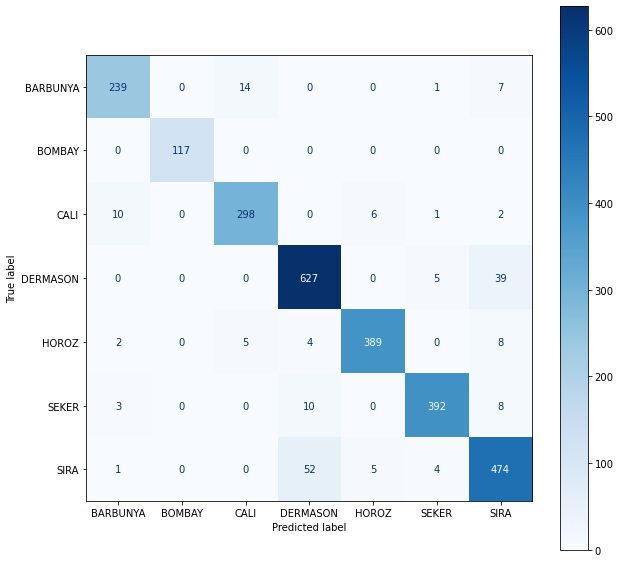

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
a = plot_confusion_matrix(rbf, test_scaled, y_test,cmap='Blues',ax=ax) 

## 6. Using Stochastic Gradient Classifier

<br>
<br>
Stochastic Gradient Descent is also an ML algorithm for classification with all together different parameters to finetune the parameters. The SGDClassifier does not have kernel functionality but it provides with functionality with different loss functions,setting up the learning rate,fit intercept, max iterations, etc.

The SGDClassifier fares well but not as good as the SVMClassifier. The main reason is SVMClassifier have far more complex computation and range of features to compute the datapoints.



After experimenting with the SGD Classifier we found the best result with loss_function as 'hinge' and regularisation as 'L2'. The Accuracy score is given below.
<br>
<br>
***
**Output**<br>
Accuracy Score (Training Dataset):  0.9193607641440118 <br>
Accuracy Score (Test Dataset):  0.9181050312155711
***

<br>
<br>
If we change the regularisation to 'elasicnet' we are getting close score to the 'L2' but not better than it. The SGDClassifier underperforms than SVMClassifier with <strong>kernel = 'RBF' or kernel = 'Linear'</strong> but it is surely better performing than SVM's <mark>Sigmoid kernel</mark>. The experiment with finetuned parameters are mentioned at the end of markdown and only best performing factors are taken into consideration here.

In [15]:
sgd = SGDClassifier(loss='hinge',penalty='l2').fit(training_scaled, y_train)

## Setting Parameters for model

In [16]:
train_sgd = sgd.predict(training_scaled)
test_sgd = sgd.predict(test_scaled)

> ## 6.1 Scores on SGD

In [17]:
accuracy_sgd = accuracy_score(y_train, train_sgd)
print('Accuracy Score (Training Dataset): ', accuracy_sgd)

accuracy_sgd =accuracy_score(y_test, test_sgd)
print('Accuracy Score (Test Dataset): ',accuracy_sgd)

print()
print()

precision_sgd = precision_score(y_train, train_sgd, average='micro')
print('Precision Score (Training Dataset): ', precision_sgd)


precision_sgd = precision_score(y_test, test_sgd, average='micro')
print('Precision Score (Test Dataset): ', precision_sgd)



Accuracy Score (Training Dataset):  0.9157788390889052
Accuracy Score (Test Dataset):  0.9144326110907087


Precision Score (Training Dataset):  0.9157788390889052
Precision Score (Test Dataset):  0.9144326110907087


> ## 6.2 Plotting Confusion Matrix
<br>
<br>
   The Stochastic gradient descent fares well in predicting the classes of the beans. The SGD classifier predicts the classes of the beans and further performance is evaluated by the FPR and TPR. 

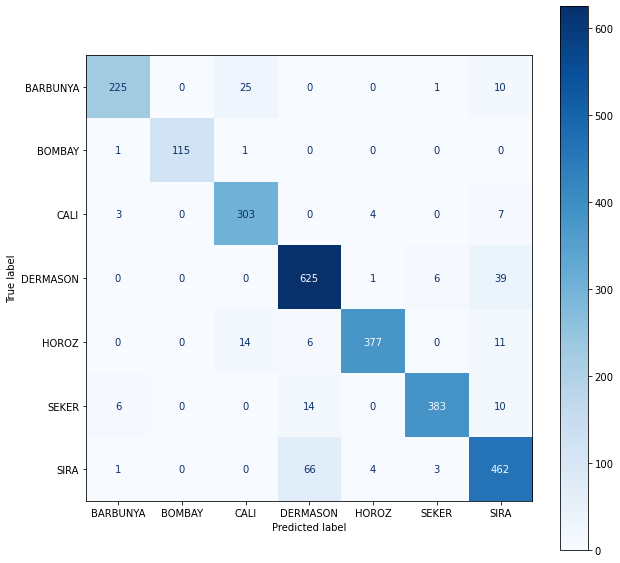

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
b = plot_confusion_matrix(sgd, test_scaled, y_test,cmap='Blues',ax=ax)  

## 7. Comparison of models

<br>
<br>
   The above classifiers helps us determine the correct class of beans, with each having different dimensions and characteristics. After tweaking the parameters of the model we can see some change in the accuracy scores of train and test data but the variation is quite large, hence the model is set to optimal parameters.

   Performance of the classifiers has been exceptional as they both have high accuracy and precision scores. However, the SVMClassifier performs a little better than the Stochastic Gradient Descent which is noticeable through the confusion matrix. The Support Vector Machine Classifier classifies the beans of <font color='red'>BOMBAY</font> class perfectly and the Stochastic Gradient Descent fails to capture all the beans of <font color='red'>BOMBAY</font> class. Also there are minor changes in the confusion matrix of SGD Classifier.

> ### 7.1 Scores on SVM

In [19]:
accuracy_lin = linear.score(test_scaled, y_test)
accuracy_poly = poly.score(test_scaled, y_test)
accuracy_rbf = rbf.score(test_scaled, y_test)
accuracy_sig = sig.score(test_scaled, y_test)

RED = '\x1b[1;31m'
black='\x1b[0;30m'


print("Accuracy Linear Kernel: ", accuracy_lin)
print("Accuracy Polynomial Kernel: ", accuracy_poly)
print(" \x1b[1;31m Accuracy Radial Basis Kernel(RBF): ",RED,accuracy_rbf,black)
print("Accuracy Sigmoid Kernel: ", accuracy_sig,black)

print()
print('=======================================================================')
print()

precision_rbf_std = precision_score(y_test, rbf_ypred, average='macro')
precision_lin = precision_score(linear_ypred, y_test,average='macro')
precision_poly = precision_score(poly_ypred, y_test,average='macro')
precision_sig = precision_score(sig_ypred, y_test,average='macro')


print("Precision Linear Kernel: ", precision_lin,black)
print("Precision Polynomial Kernel: ", precision_poly,black)
print("Precision Radial Basis Kernel(RBF): ", precision_rbf_std,black)
print("Precision Sigmoid Kernel: ", precision_sig,black)




Accuracy Linear Kernel:  0.9294895336026442
Accuracy Polynomial Kernel:  0.9291222915901579
  Accuracy Radial Basis Kernel(RBF):   0.9313257436650753 
Accuracy Sigmoid Kernel:  0.7098788101358795 


Precision Linear Kernel:  0.9387258633556906 
Precision Polynomial Kernel:  0.9369470782424922 
Precision Radial Basis Kernel(RBF):  0.9440465007198352 
Precision Sigmoid Kernel:  0.6040984305859416 


> ## 7.3 Scores on SGD

In [20]:
accuracy_sgd = accuracy_score(y_train, train_sgd)
print('Accuracy Score (Training Dataset): ', accuracy_sgd)

accuracy_sgd =accuracy_score(y_test, test_sgd)
print('Accuracy Score (Test Dataset): ',accuracy_sgd)

print()
print()

precision_sgd = precision_score(y_train, train_sgd, average='micro')
print('Precision Score (Training Dataset): ', precision_sgd)


precision_sgd = precision_score(y_test, test_sgd, average='micro')
print('Precision Score (Test Dataset): ', precision_sgd)

Accuracy Score (Training Dataset):  0.9157788390889052
Accuracy Score (Test Dataset):  0.9144326110907087


Precision Score (Training Dataset):  0.9157788390889052
Precision Score (Test Dataset):  0.9144326110907087


> ## 7.4 Finetuning SGDClassifier

In [21]:
sgd = SGDClassifier(loss='squared_hinge',penalty='elasticnet',alpha=0.0005).fit(training_scaled, y_train)


train_sgd = sgd.predict(training_scaled)
test_sgd = sgd.predict(test_scaled)


accuracy_sgd = accuracy_score(y_train, train_sgd)
print('Accuracy Score (Training Dataset): ', accuracy_sgd)

accuracy_sgd =accuracy_score(y_test, test_sgd)
print('Accuracy Score (Test Dataset): ',accuracy_sgd)

print()
print()

precision_sgd = precision_score(y_train, train_sgd, average='micro')
print('Precision Score (Training Dataset): ', precision_sgd)


precision_sgd = precision_score(y_test, test_sgd, average='micro')
print('Precision Score (Test Dataset): ', precision_sgd)



Accuracy Score (Training Dataset):  0.8996142542248347
Accuracy Score (Test Dataset):  0.8854204921042967


Precision Score (Training Dataset):  0.8996142542248347
Precision Score (Test Dataset):  0.8854204921042967


/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
